In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import linregress

# Import the time module.
import time

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
#cities = []
# Identify the nearest city for each latitude and longitude combination.
#for coordinate in coordinates:
 #   city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
  #  if city not in cities:
   #     cities.append(city)
# Print the city count to confirm sufficient count.
#len(cities)

In [4]:
load_csv = "weather_data/cities.csv"
city_data_df = pd.read_csv(load_csv)
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Mataura,NZ,2021-10-06 19:36:04,-46.1927,168.8643,49.48,83,36,2.24
1,1,Hobart,AU,2021-10-06 19:36:04,-42.8794,147.3294,48.06,77,75,1.99
2,2,Atuona,PF,2021-10-06 19:36:04,-9.8000,-139.0333,78.42,79,14,22.66
3,3,Chuy,UY,2021-10-06 19:36:04,-33.6971,-53.4616,55.33,64,63,17.69
4,4,Albany,US,2021-10-06 19:31:13,42.6001,-73.9662,71.94,69,60,2.71
...,...,...,...,...,...,...,...,...,...,...
559,559,Olinda,BR,2021-10-06 19:38:31,-8.0089,-34.8553,80.33,74,75,16.11
560,560,Morshansk,RU,2021-10-06 19:38:31,53.4435,41.8107,40.46,71,95,4.90
561,561,Hofn,IS,2021-10-06 19:38:31,64.2539,-15.2082,41.02,75,75,17.27
562,562,Am Timan,TD,2021-10-06 19:38:32,11.0297,20.2827,81.18,56,5,2.28


In [5]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [6]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/06/21'

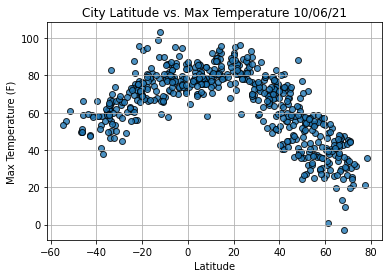

In [7]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

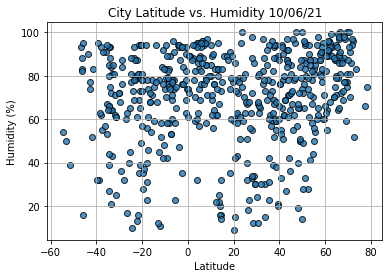

In [8]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

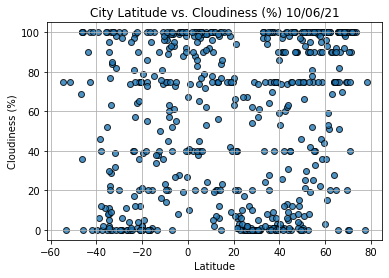

In [9]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

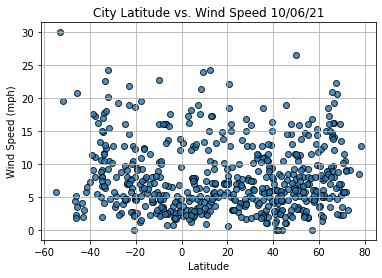

In [10]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [11]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression of hemisphere weather data
    (slope, intercept, r_value, p_value, std_error) = linregress(x_values, y_values)
    
    #Calcultate the regression line y values from slope and intercept
    regress_values = x_values * slope + intercept
    
    #Equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create scatter plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #annotate line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [12]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


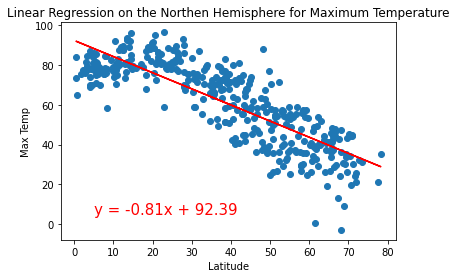

In [16]:
#linear regression on northen hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#linear regression function
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northen Hemisphere for Maximum Temperature", "Max Temp",(5,5))


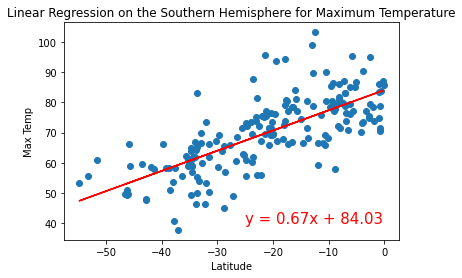

In [24]:
#linear regression on southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#linear regression function
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp",(-25,40))


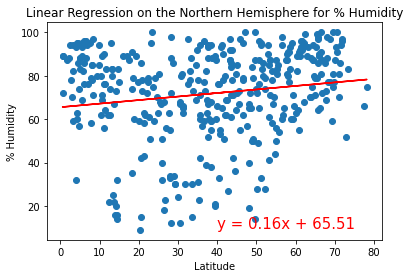

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

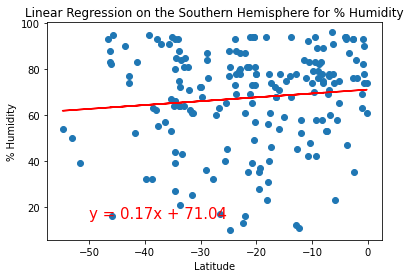

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

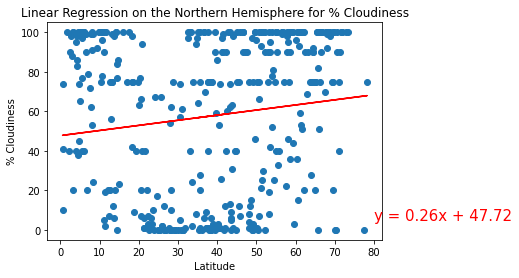

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(80,5))

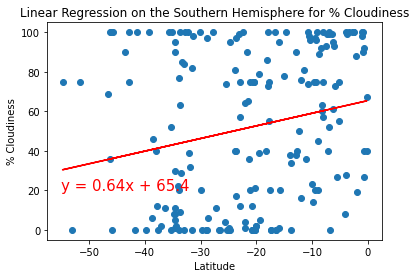

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,20))

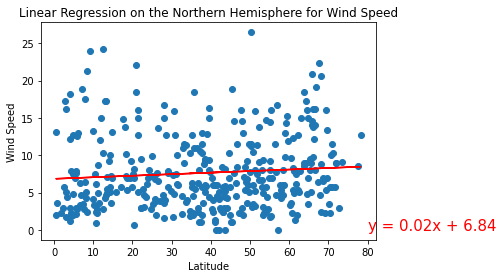

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(80,0))

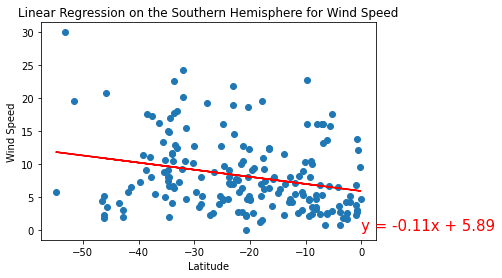

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(0,0))